In [1]:
import pandas as pd
import time
import sys
sys.path.append('/Users/pradap/Documents/Research/Python-Package/scaling/dmagellan')
# sys.path.append('/scratch/pradap/python-work/dmagellan')

from dmagellan.blocker.overlap.overlapblocker import OverlapBlocker
import psutil
from dask import multiprocessing, threaded
from dask.diagnostics import ProgressBar, Profiler, ResourceProfiler, CacheProfiler, visualize
from distributed import Client
import cloudpickle

pbar = ProgressBar()
pbar.register()
print("Mem. usage before reading:{0}".format( psutil.virtual_memory().used/1e9))
#A = pd.read_csv('../datasets/sample_citeseer_200k.csv')
#B = pd.read_csv('../datasets/sample_dblp_200k.csv')
A = pd.read_csv('../datasets/movies.csv')
B = pd.read_csv('../datasets/songs.csv')
print(len(A), len(B))
print("Mem. usage after reading:{0}".format(psutil.virtual_memory().used/1e9))

memUsageBefore = psutil.virtual_memory().used/1e9
timeBefore = time.time()
ob = OverlapBlocker()
# print("Mem. usage before reading:{0}", memUsageBefore)
C = ob.block_tables(A, B, 'id', 'id', 'title', 'title', overlap_size=4, compute=False, nltable_chunks=1, nrtable_chunks=4, rem_stop_words=False, l_output_attrs=['title'],
                    r_output_attrs=['title'])


Mem. usage before reading:5.254356992
(869800, 961593)
Mem. usage after reading:5.610913792


NameError: global name 'process_and_tokenize_ltable' is not defined

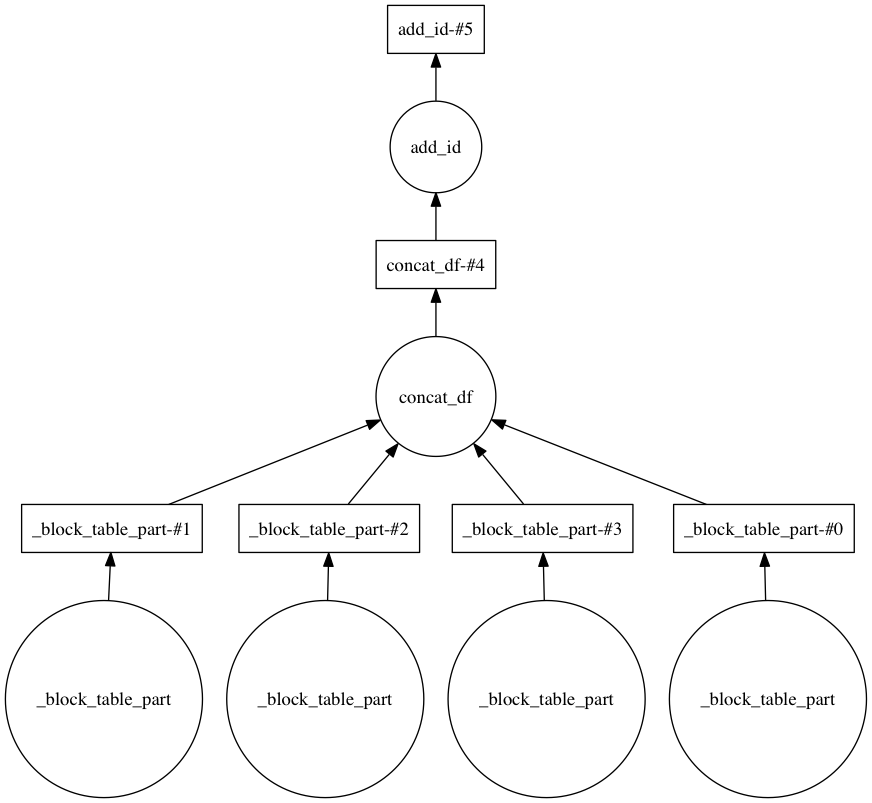

In [5]:
C.visualize()